In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 3.7 MB/s eta 0:00:00


In [3]:
#Required Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [4]:
num_locations = 15
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 4

In [24]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-0.7))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [25]:
#TASK 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [27]:
# Fitness Function
import math

def distance(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

def evalVRP(individual):
    routes = [[] for _ in range(num_vehicles)]
    for i, loc in enumerate(individual):
        routes[i % num_vehicles].append(locations[loc])
    dists = []
    for r in routes:
        if not r:
            dists.append(0)
            continue
        total = distance(depot, r[0])
        for i in range(len(r) - 1):
            total += distance(r[i], r[i+1])
        total += distance(r[-1], depot)
        dists.append(total)
    return (sum(dists), (sum((x - (sum(dists)/num_vehicles))**2 for x in dists)/num_vehicles)**0.5)

toolbox.register("evaluate", evalVRP)


In [35]:
# Genetic Operators
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=4)

In [29]:
def plot_routes(individual, title="Routes"):
    routes = [[] for _ in range(num_vehicles)]
    for i, loc in enumerate(individual):
        routes[i % num_vehicles].append(locations[loc])
    plt.figure(figsize=(6, 6))
    for r in routes:
        if not r:
            continue
        x = [depot[0]] + [p[0] for p in r] + [depot[0]]
        y = [depot[1]] + [p[1] for p in r] + [depot[1]]
        plt.plot(x, y, marker='o')
    plt.scatter(depot[0], depot[1], c='red', marker='s')
    plt.title(title)
    plt.show()

gen	nevals	avg    	min    
0  	100   	474.297	12.1659
1  	79    	456.447	12.4738
2  	79    	447.272	4.88438
3  	74    	444.462	4.88438
4  	83    	440.532	4.88438
5  	83    	436.69 	4.88438
6  	69    	419.546	12.9453
7  	90    	421.853	6.96802
8  	82    	406.406	6.60006
9  	86    	411.421	6.60006
10 	79    	396.699	6.60006
11 	85    	395.39 	8.59121
12 	76    	383.934	11.8075
13 	72    	364.542	5.39285
14 	69    	373.402	5.39285
15 	81    	374.81 	20.1941
16 	71    	349.305	18.6794
17 	78    	347.417	14.0914
18 	70    	319.909	19.1375
19 	79    	315.714	11.3616
20 	73    	331.652	10.9512
21 	74    	326.644	9.66035
22 	79    	315.376	12.0608
23 	81    	328.898	17.7779
24 	76    	314.866	21.1604
25 	77    	327.539	13.0647
26 	71    	310.234	16.0674
27 	77    	323.008	3.49134
28 	76    	314.463	11.4421
29 	72    	318.538	9.82612
30 	89    	316.388	16.6416
31 	76    	328.698	13.1287
32 	79    	338.397	11.2169
33 	75    	332.215	17.04  
34 	77    	314.862	10.8116
35 	74    	307.907	10.1612
3

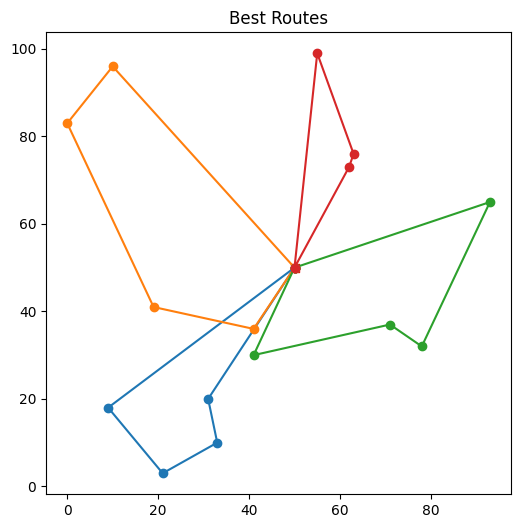

In [39]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 50, stats=stats, halloffame=hof)

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()
    best = hof[0]
    print("Best fitness:", best.fitness.values)
    plot_routes(best, "Best Routes")